In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
batch_size = 32  # The default batch size of keras.
num_classes = 10  # Number of class for the dataset
epochs = 100

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
50000 train samples
10000 test samples


In [3]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

# Convert class vectors to binary class matrices. This is called one hot encoding.
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# resnet50 Model

In [4]:
resnet50 = tf.keras.applications.resnet50.ResNet50(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x = tf.keras.layers.Dense(10, activation='softmax')(resnet50.output)
resnet50_model = tf.keras.Model(resnet50.input, x)

In [5]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

resnet50_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [6]:
history1 = resnet50_model.fit(x_train, y_train, epochs=50, batch_size=64, 
                                  validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 77s 48ms/step - loss: 2.3290 - accuracy: 0.2205 - val_loss: 2.1880 - val_accuracy: 0.2840
Epoch 2/50
782/782 [==============================] - 36s 46ms/step - loss: 1.8052 - accuracy: 0.3444 - val_loss: 1.7875 - val_accuracy: 0.3768
Epoch 3/50
782/782 [==============================] - 36s 46ms/step - loss: 1.5990 - accuracy: 0.4237 - val_loss: 1.5979 - val_accuracy: 0.4239
Epoch 4/50
782/782 [==============================] - 36s 46ms/step - loss: 1.4510 - accuracy: 0.4750 - val_loss: 1.5222 - val_accuracy: 0.4601
Epoch 5/50
782/782 [==============================] - 35s 45ms/step - loss: 1.3303 - accuracy: 0.5219 - val_loss: 1.4528 - val_accuracy: 0.4860
Epoch 6/50
782/782 [==============================] - 35s 45ms/step - loss: 1.2185 - accuracy: 0.5629 - val_loss: 1.4291 - val_accuracy: 0.5023
Epoch 7/50
782/782 [==============================] - 36s 46ms/step - loss: 1.1210 - accuracy: 0.6028 - val_loss: 1.4601 - val_accuracy:

In [7]:
resnet50_model.save("resnet50_model_10.h5")

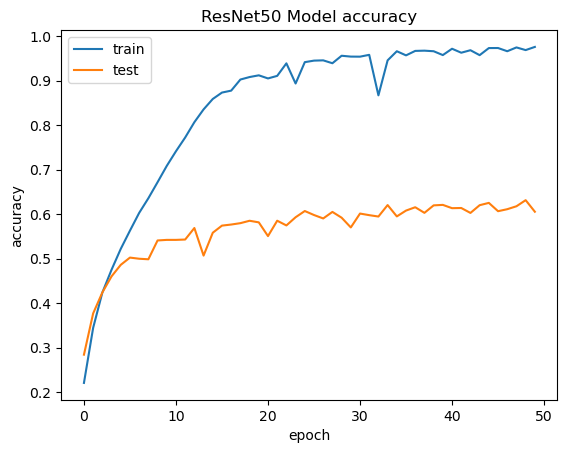

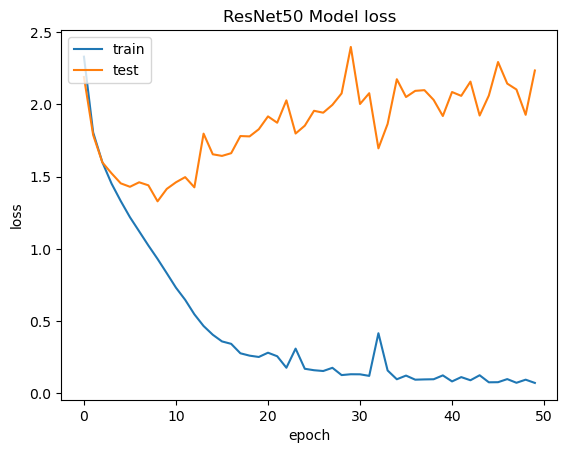

In [8]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('ResNet50 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('ResNet50 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# resnet101 Model

In [9]:
resnet101 = tf.keras.applications.resnet.ResNet101(include_top=False, weights=None,input_shape=(32, 32, 3), pooling='avg')
x1 = tf.keras.layers.Dense(10, activation='softmax')(resnet101.output)
resnet101_model = tf.keras.Model(resnet101.input, x1)

In [10]:
opt = tf.keras.optimizers.Adam(learning_rate=1e-4)

resnet101_model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
history2 = resnet101_model.fit(x_train, y_train, epochs=50,
                                    batch_size=64, validation_data=(x_test, y_test))

Epoch 1/50
782/782 [==============================] - 136s 90ms/step - loss: 2.3333 - accuracy: 0.1965 - val_loss: 2.0517 - val_accuracy: 0.2563
Epoch 2/50
782/782 [==============================] - 69s 88ms/step - loss: 1.9213 - accuracy: 0.2995 - val_loss: 1.9056 - val_accuracy: 0.3303
Epoch 3/50
782/782 [==============================] - 68s 87ms/step - loss: 1.7692 - accuracy: 0.3625 - val_loss: 1.7819 - val_accuracy: 0.3729
Epoch 4/50
782/782 [==============================] - 70s 89ms/step - loss: 1.6419 - accuracy: 0.4107 - val_loss: 1.7182 - val_accuracy: 0.4029
Epoch 5/50
782/782 [==============================] - 68s 87ms/step - loss: 1.5354 - accuracy: 0.4510 - val_loss: 1.5928 - val_accuracy: 0.4364
Epoch 6/50
782/782 [==============================] - 68s 87ms/step - loss: 1.4252 - accuracy: 0.4903 - val_loss: 1.6439 - val_accuracy: 0.4479
Epoch 7/50
782/782 [==============================] - 68s 87ms/step - loss: 1.3276 - accuracy: 0.5272 - val_loss: 1.4820 - val_accuracy

In [12]:
resnet101_model.save("resnet101_model_10.h5")

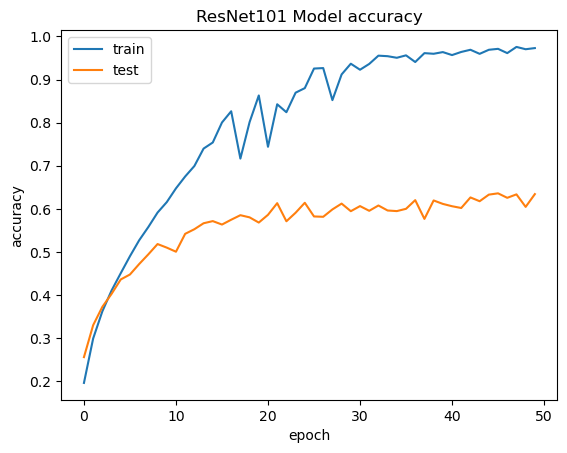

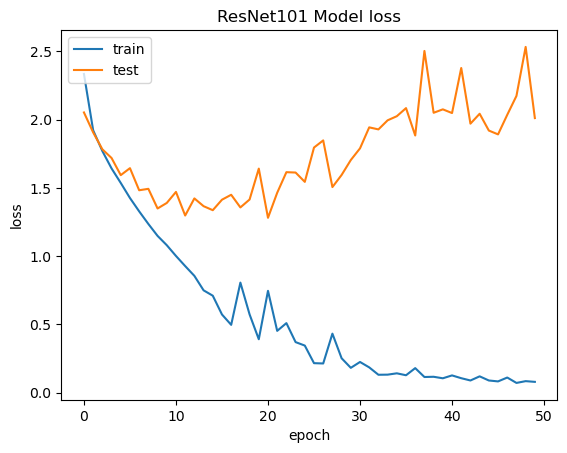

In [13]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('ResNet101 Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('ResNet101 Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()